<a href="https://colab.research.google.com/github/grantedfornothing/classExplore/blob/main/%E1%84%8E%E1%85%AE%E1%86%A8%E1%84%80%E1%85%AE%E1%84%80%E1%85%A7%E1%86%BC%E1%84%80%E1%85%B5_%E1%84%89%E1%85%B3%E1%86%BC%E1%84%8C%E1%85%A1_%E1%84%8B%E1%85%A8%E1%84%8E%E1%85%B3%E1%86%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Winner World Cup 2022 Simulation ⚽


# Step1:  Import the training dataset

In [ ]:
# 라이브러리 불러오기

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [ ]:
# 드라이브에서 csv파일 불러오기
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/international_matches.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step2: Exploratory Date Analysis

In [ ]:
# DB 요약하기
df.describe()

,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


In [ ]:
# 마지막 5개 데이터 보기
df.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


In [ ]:
# 중복데이터 보기
duplicates = df.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
23916    False
23917    False
23918    False
23919    False
23920    False
Length: 23921, dtype: bool


In [ ]:
# 열 레이블 확인하기
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

### 2.1 각 column의 feature의 **의미** 파악하기
* date: 경기일자
* home_team, away_team: 홈, 어웨이팀(txt)
* home_team_continent, away_team_continent: 홈, 어웨이팀 대륙(txt)
* home_team_fifa_rank, away_team_fifa_rank: 홈, 어웨이팀 피파 랭킹(int)
* home_team_total_fifa_points, away_team_total_fifa_points: 홈, 어웨이팀 피파 점수(int)
* home_team_score, away_team_score: 홈, 어웨이팀 스코어(int)
* tournament: 대회 명목(친선경기 포함 총 82개 대회)(txt)
* city, country: 경기도시, 국가(txt)
* neutral_location: 경기지역이 중립지역인지 여부(bool)
* shoot_out: 승부차기 여부(txt: yes, no)
* home_team_result: 홈팀 승리여부(txt: win, draw, lose)
* home_team_goalkeeper_score, away_team_goalkeeper_score: 홈, 어웨이팀 골키퍼 점수(float)
* home_team_mean_defense_score, away_team_mean_defense_score: 홈, 어웨이팀 평균 수비수 점수(float)
* home_team_mean_midfield_score, away_team_mean_midfield_score: 홈, 어웨이팀 평균 미드필더 점수(float)
* home_team_mean_offense_score, away_team_mean_offense_score: 홈, 어웨이팀 평균 공격수 점수(float)


In [ ]:
# null data 파악하기
print(pd.isnull(df).sum())

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64


In [ ]:
df['date'] = pd.to_datetime(df['date'])

<Axes: xlabel='home_team_continent', ylabel='home_team_fifa_rank'>

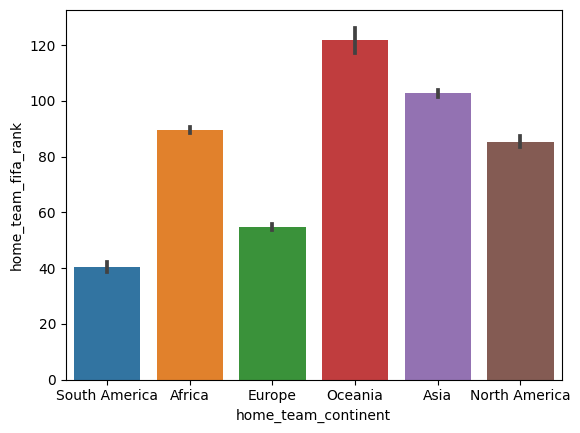

In [ ]:
# (홈팀) 대륙에 따른 (홈팀) 피파랭크 시각화
sns.barplot(x="home_team_continent", y="home_team_fifa_rank", data=df)

<Axes: xlabel='home_team_continent', ylabel='home_team_score'>

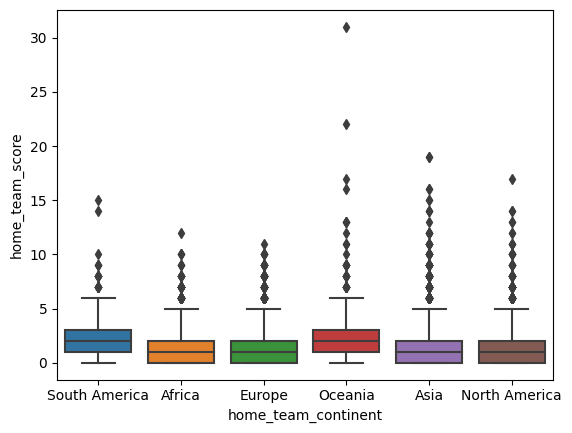

In [ ]:
# (홈팀) 대륙에 따른 (홈팀) 득점 시각화
sns.boxplot(x="home_team_continent", y="home_team_score", data=df)

### 2.2 피파랭킹 top 10

In [ ]:
# fifa_rank 데이터 프레임 만들기
fifa_rank = df[['date', 'home_team', 'away_team', 'home_team_fifa_rank', 'away_team_fifa_rank',
'away_team_total_fifa_points','home_team_total_fifa_points']]
# home 데이터 프레임 만들기
home = fifa_rank[['date', 'home_team','home_team_fifa_rank','home_team_total_fifa_points']].rename(columns = {'home_team': 'team', 'home_team_fifa_rank' : 'rank','home_team_total_fifa_points' : 'rank_points' })
# away 데이터 프레임 만들기
away = fifa_rank[['date', 'away_team','away_team_fifa_rank','away_team_total_fifa_points']].rename(columns = {'away_team': 'team', 'away_team_fifa_rank' : 'rank','away_team_total_fifa_points' : 'rank_points' })
# home, away 데이터를 합치기
fifa_rank = home.append(away)

# team 및 date 열을 오름차순 및 내림차순으로 정렬하여 fifa_rank 데이터프레임을 정렬
# 데이터프레임을 팀 이름으로 정렬, 각 팀 내에서 가장 최근 날짜 나타내기
fifa_rank  = fifa_rank.sort_values(['team', 'date'], ascending=[True, False])
# 각 팀 그룹 내의 각 행에 고유한 인덱스 번호를 할당하는 row_number라는 새 열 만들기
fifa_rank['row_number'] = fifa_rank.groupby('team').cumcount()+1
# 각 팀에서 최신 랭킹만을 선택, 상위 10개 팀을 선택
fifa_rank_top = fifa_rank[fifa_rank['row_number']==1].drop('row_number',axis=1).nsmallest(10, 'rank')

# 가장 강한 10개 나라 나타내기
fifa_rank_top

<ipython-input-71-f9f4f5c695dd>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fifa_rank = home.append(away)


,date,team,rank,rank_points
23760,2022-06-06,Brazil,1,1832
23909,2022-06-14,Belgium,2,1827
23885,2022-06-13,France,3,1789
23741,2022-06-05,Argentina,4,1765
23906,2022-06-14,England,5,1761
23907,2022-06-14,Italy,6,1723
23866,2022-06-12,Spain,7,1709
23867,2022-06-12,Portugal,8,1674
23903,2022-06-14,Mexico,9,1658
23908,2022-06-14,Netherlands,10,1658


### 2.3
공격 점수 top 10팀

In [ ]:
# 기본적인 작동원리는 위의 피파랭킹 top10과 같음
# offense 데이터 프레임 만들기
offense = df[['date', 'home_team', 'away_team', 'home_team_mean_offense_score', 'away_team_mean_offense_score']]
home = offense [['date', 'home_team','home_team_mean_offense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_offense_score' : 'offense_score'})
away = offense [['date', 'away_team','away_team_mean_offense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_offense_score' : 'offense_score'})
# home, away 데이터 합치기
offense  = home.append(away)

# 최근 경기 보기
offense   = offense .sort_values(['team', 'date'], ascending=[True, False])
offense ['row_number'] = offense .groupby('team').cumcount()+1
offense_top_data = offense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'offense_score')
offense_top_data

<ipython-input-72-0a21c9af66b9>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  offense  = home.append(away)


,date,team,offense_score
23741,2022-06-05,Argentina,89.0
23885,2022-06-13,France,88.3
23906,2022-06-14,England,88.0
23760,2022-06-06,Brazil,86.3
23867,2022-06-12,Portugal,86.0
23909,2022-06-14,Belgium,85.7
23907,2022-06-14,Italy,85.3
23866,2022-06-12,Spain,85.0
23909,2022-06-14,Poland,84.7
23862,2022-06-11,Uruguay,84.3


### 2.4 수비 점수 top 10팀

In [ ]:
# 기본적인 작동원리는 위의 피파랭킹 top10과 같음
# 위와 같은 방식으로 데이터 프레임 생성 후 최근 경기, 수비 점수 top 10팀 구하기
defense = df[['date', 'home_team', 'away_team', 'home_team_mean_defense_score', 'away_team_mean_defense_score']]
home = defense [['date', 'home_team','home_team_mean_defense_score']].rename(columns = {'home_team': 'team', 'home_team_mean_defense_score' : 'defense_score'})
away = defense [['date', 'away_team','away_team_mean_defense_score']].rename(columns = {'away_team': 'team', 'away_team_mean_defense_score' : 'defense_score'})
defense  = home.append(away)

defense   = defense .sort_values(['team', 'date'], ascending=[True, False])
defense ['row_number'] = defense .groupby('team').cumcount()+1
defense_top_data = defense [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'defense_score')
defense_top_data

<ipython-input-73-8a7560ce4165>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  defense  = home.append(away)


,date,team,defense_score
23866,2022-06-12,Spain,86.5
23908,2022-06-14,Netherlands,85.2
23867,2022-06-12,Portugal,85.2
23906,2022-06-14,England,85.0
23760,2022-06-06,Brazil,84.8
23885,2022-06-13,France,84.2
23907,2022-06-14,Italy,84.2
23907,2022-06-14,Germany,84.0
23741,2022-06-05,Argentina,82.2
23879,2022-06-13,Morocco,81.2


### 2.5 미드필더 점수 top 10팀

In [ ]:
# 기본적인 작동원리는 위의 피파랭킹 top10과 같음
# 위와 같은 방식으로 데이터 프레임 생성 후 최근 경기, 미드필더 점수 top 10팀 구하기
midfield = df[['date', 'home_team', 'away_team', 'home_team_mean_midfield_score', 'away_team_mean_midfield_score']]
home = midfield [['date', 'home_team','home_team_mean_midfield_score']].rename(columns = {'home_team': 'team', 'home_team_mean_midfield_score' : 'midfield_score'})
away = midfield [['date', 'away_team','away_team_mean_midfield_score']].rename(columns = {'away_team': 'team', 'away_team_mean_midfield_score' : 'midfield_score'})
midfield  = home.append(away)

midfield   = midfield .sort_values(['team', 'date'], ascending=[True, False])
midfield ['row_number'] = defense .groupby('team').cumcount()+1
midfield_top_data = midfield [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'midfield_score')
midfield_top_data

<ipython-input-74-73dfe745434f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  midfield  = home.append(away)


,date,team,midfield_score
23907,2022-06-14,Germany,87.8
23885,2022-06-13,France,86.8
23866,2022-06-12,Spain,86.0
23909,2022-06-14,Belgium,85.5
23760,2022-06-06,Brazil,85.5
23907,2022-06-14,Italy,84.5
23867,2022-06-12,Portugal,84.5
23885,2022-06-13,Croatia,84.2
23741,2022-06-05,Argentina,84.0
23906,2022-06-14,England,84.0


### 2.6 포지션 통합 평균점수 top 10팀

In [ ]:
# 홈, 어웨이 각 포지션별 통합 평균 점수를 추출
df['home_total_score'] = (df['home_team_mean_offense_score'] + df['home_team_mean_defense_score']+df['home_team_mean_midfield_score'])/3
df['away_total_score'] = (df['away_team_mean_offense_score'] + df['away_team_mean_defense_score']+df['away_team_mean_midfield_score'])/3

In [ ]:
# 통합 평균 점수 데이터 프레임 생성
total_score = df[['date', 'home_team', 'away_team', 'home_total_score', 'away_total_score']]
home = total_score [['date', 'home_team','home_total_score']].rename(columns = {'home_team': 'team', 'home_total_score' : 'total_score'})
away = total_score [['date', 'away_team','away_total_score']].rename(columns = {'away_team': 'team', 'away_total_score' : 'total_score'})
# 홈, 어웨이 점수 데이터 합치기
total_score  = home.append(away)

# 최근 경기일자로 표시, 통합 점수가 가장 높은 10팀 나타내기
total_score   = total_score .sort_values(['team', 'date'], ascending=[True, False])
total_score ['row_number'] = defense .groupby('team').cumcount()+1
total_score_top_10 = total_score [offense ['row_number']==1].drop('row_number',axis=1).nlargest(10, 'total_score')
total_score_top_10

<ipython-input-76-acd3796ad4e6>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total_score  = home.append(away)


,date,team,total_score
23885,2022-06-13,France,86.433333
23866,2022-06-12,Spain,85.833333
23906,2022-06-14,England,85.666667
23760,2022-06-06,Brazil,85.533333
23867,2022-06-12,Portugal,85.233333
23741,2022-06-05,Argentina,85.066667
23907,2022-06-14,Germany,84.833333
23907,2022-06-14,Italy,84.666667
23909,2022-06-14,Belgium,84.000000
23908,2022-06-14,Netherlands,83.900000


# Step 3: Data Preprocessing

## 3.1 Feature Engineering

In [ ]:
# 새로운 열 추가하기
# 여기서는 랭크 차이, 평균 랭크, 피파 점수 차이, 승리여부를 새로운 열로 추가한다
# 향후 앞의 3개의 데이터 셋은 독립변수, 뒤의 1개 데이터 셋은 종속 변수로 설정할 것

# 홈팀과 원정팀의 FIFA 랭킹 차이를 계산하는 rank_difference
df['rank_difference'] = df['home_team_fifa_rank'] - df['away_team_fifa_rank']
# 홈팀과 원정팀의 평균 FIFA 랭킹을 계산하는 average_rank
df['average_rank'] = (df['home_team_fifa_rank'] + df['away_team_fifa_rank'])/2
# 홈팀과 원정팀의 총 FIFA 포인트 차이를 계산하는 point_difference
df['point_difference'] = df['home_team_total_fifa_points'] - df['away_team_total_fifa_points']
# 홈팀과 원정팀 간의 득점 차이를 계산하는 score_difference
df['score_difference'] = df['home_team_score'] - df['away_team_score']
# 경기 승리 여부를 확인하는 is_won, 차이가 0보다 크면 true, 비기면 진 것으로 간주
df['is_won'] = df['score_difference'] > 0

# 경기가 친선경기인지 여부를 확인하는 is_stake, 'Friendly'가 아니면 경쟁전으로 간주
df['is_stake'] = df['tournament'] != 'Friendly'
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,away_team_mean_offense_score,away_team_mean_midfield_score,home_total_score,away_total_score,rank_difference,average_rank,point_difference,score_difference,is_won,is_stake
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,NaN,NaN,NaN,NaN,37,40.5,0,2,True,True
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,NaN,NaN,NaN,NaN,-6,11.0,0,0,False,False
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,NaN,NaN,NaN,NaN,-59,64.5,0,5,True,True
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,NaN,NaN,NaN,NaN,-21,75.5,0,1,True,False
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,NaN,NaN,NaN,NaN,62,36.0,0,-2,False,True


## Step 4: Training & Evaluation

### 3.2.1 로지스틱 회귀 모델

Accuracy: 0.684012539184953
Precision: 0.6873857404021938
Recall: 0.6449399656946827
F1 score: 0.6654867256637168


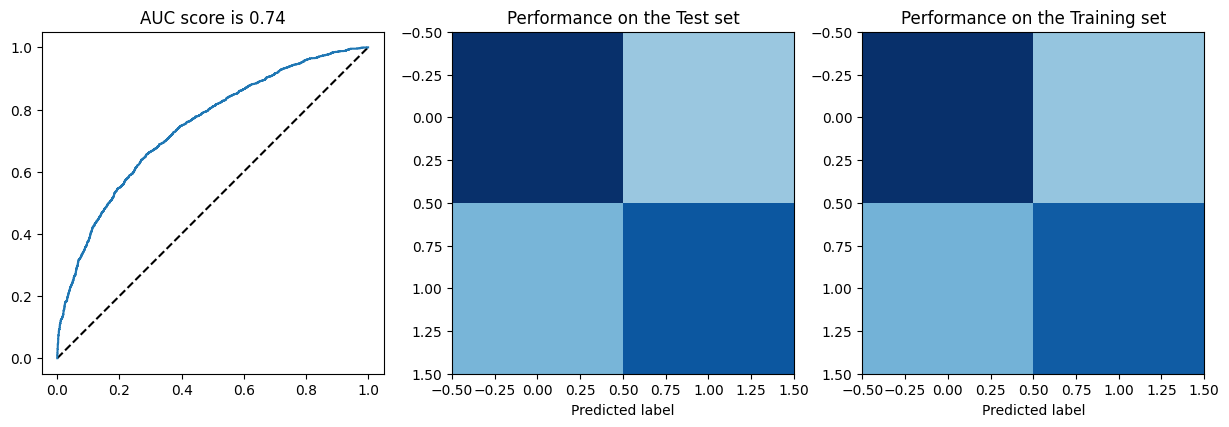

In [ ]:
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# X는 독립 변수, 'average_rank', 'rank_difference', 'point_difference' 3개 열로 이루어진 데이터프레임
# y는 종속 변수, 'is_won' 열로 이루어진 데이터프레임
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference']], df['is_won']
# train_test_split 함수를 이용하여 전체 데이터를 8:2 비율로 train set과 test set으로 할당
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# logistic_regression 객체를 생성
logreg = linear_model.LogisticRegression(C=1e-5)
# PolynomialFeatures를 이용하여, X의 feature들을 다항식으로 변환
features = PolynomialFeatures(degree=2)
# Pipeline으로 다항식 feature 변환 후, 로지스틱 회귀 모델 학습
model = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logreg)
])
model = model.fit(X_train, y_train)

# 모델 성능 시각화 및 평가

# ROC 곡선을 그리기 위해 fpr(False Positive Rate), tpr(True Positive Rate), _ 값 반환
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# matplotlib를 사용하여 ROC 곡선과 모델의 AUC(Area Under the Curve) 시각화하기
# 새로운 figure 생성, 크기는 가로 15, 세로 5로 지정
plt.figure(figsize=(15,5))
# 1행 3열의 subplot 중 첫 번째에 그리기, 이 subplot을 ax 변수에 할당
ax = plt.subplot(1,3,1)
# subplot ax에 x축과 y축의 값이 [0, 1]인 직선 그리기, k--는 검은 점선을 의미

ax.plot([0, 1], [0, 1], 'k--')
# subplot ax에 x축은 fpr, y축은 tpr을 나타내는 점들을 이어서 그리기
ax.plot(fpr, tpr)
# subplot ax에 제목 설정(AUC score is XX.XX 형태, 계산한 AUC score 값으로 XX.XX를 대체)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
# subplot ax의 x축과 y축의 비율을 1:1로 맞추기(정사각형 모양)
ax.set_aspect(1)

# 테스트 세트와 훈련 세트에 대한 오차행렬(confusion matrix) 계산 및 시각화
# subplot을 생성하고, 생성한 subplot을 ax 변수에 저장
ax = plt.subplot(1,3,2)
# 예측한 X_test 데이터의 예측값과 실제값으로 confusion matrix를 생성하고, cm 변수에 저장
cm = confusion_matrix(y_test, model.predict(X_test))
# imshow 함수를 사용하여 cm에 저장된 confusion matrix를 이미지로 출력
# cmap 옵션으로 colormap을 지정하고, clim 옵션으로 이미지의 최대/최소값을 지정
ax.imshow(cm, cmap='Blues', clim = (0, cm.max()))
# confusion matrix 이미지의 x축 레이블을 설정
ax.set_xlabel('Predicted label')
# 그래프의 제목 설정
ax.set_title('Performance on the Test set')

# subplot을 생성하고, 생성한 subplot을 ax 변수에 저장
ax = plt.subplot(1,3,3)
# 예측한 X_train 데이터의 예측값과 실제값으로 confusion matrix를 생성하고, cm 변수에 저장
cm = confusion_matrix(y_train, model.predict(X_train))
# 이하 과정은 위와 동일
ax.imshow(cm, cmap='Blues', clim = (0, cm.max()))
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')
pass

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 정확도, 정밀도, 재현율, F1 점수 계산
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 정확도 결과 출력
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)



### 3.2.2 Stochastic Gradient Descent 모델

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


Confusion matrix:
[[1775  678]
 [ 863 1469]]
AUC score: 0.7460452038635087


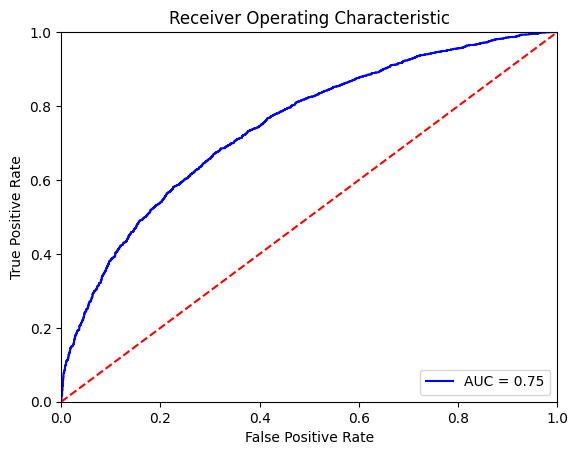

Accuracy: 0.6779519331243469
Precision: 0.6842105263157895
Recall: 0.6299313893653516
F1 Score: 0.6559499888367939


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# 트레이닝, 테스트 데이터 분리하기
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 표준화하기
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SGDClassifier를 사용하여 데이터 피팅하기
clf = SGDClassifier(loss='log', penalty='l2', alpha=0.0001, max_iter=1000, tol=1e-3, random_state=42)
clf.fit(X_train, y_train)

# 테스트 셋 평가
y_pred = clf.predict(X_test)

# confusion matrix와 AUC 점수 출력
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
print('Confusion matrix:')
print(cm)
print('AUC score:', auc)

import matplotlib.pyplot as plt

# 데이터에 대한 예측값들의 확률을 clf 모델로부터 추정하여 probs 변수에 저장
probs = clf.predict_proba(X_test)
#
위에서 추정한 확률값들 중에서 양성 클래스에 속할 확률을 preds 변수에 저장
preds = probs[:,1]
# y_test와 preds 값을 이용하여 ROC 곡선 위의 모든 임계값(threshold)에서의
# FPR과 TPR를 계산하여 fpr과 tpr에 저장하고, 해당 임계값들은 threshold에 저장
fpr, tpr, threshold = roc_curve(y_test, preds)
# y_test와 preds 값을 이용하여 AUC 값을 계산하여 roc_auc에 저장
roc_auc = roc_auc_score(y_test, preds)

# ROC 곡선 그리기 (좋은 모델일 수록 곡선이 왼쪽 상단을 향하여 그려진다)
# 그래프의 제목 설정
plt.title('Receiver Operating Characteristic')
# fpr과 tpr 값을 이용하여 ROC Curve 그리기, AUC 값을 나타내는 레이블 추가
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# 레이블을 범례로 표시
plt.legend(loc = 'lower right')
# 랜덤 추측의 성능을 나타내는 직선 그리기
plt.plot([0, 1], [0, 1],'r--')
# x축, y축 범위 설정
plt.xlim([0, 1])
plt.ylim([0, 1])
# x축, y축 레이블 설정
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# 그래프 출력
plt.show()

# 정확도 측정 및 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

### 3.2.3 KNN 모델

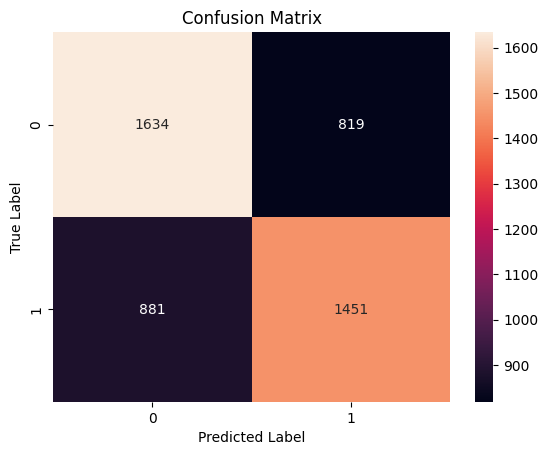

Accuracy: 0.644723092998955
Precision: 0.6392070484581498
Recall: 0.62221269296741
F1 Score: 0.6305953933072578


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 트레이닝, 테스트 데이터 분리하기
X, y = df.loc[:,['average_rank', 'rank_difference', 'point_difference']], df['is_won']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 만들기, K값은 5로 설정
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# test 데이터로 모델 예측하기
y_pred = knn.predict(X_test)

# confusion_matrix를 이용해 데이터 평가 및 시각화하기
# tp(양성(실제)-양성(예측)), tn(음성(실제), 음성(양성)이 많을 수록 좋은 모델이다)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# KNN 모델을 사용하여 X_test를 예측한 값을 y_pred에 할당
y_pred = knn.predict(X_test)
# y_test와 y_pred를 비교하여 Confusion Matrix 구하기
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix를 heatmap으로 시각화
# annot=True는 heatmap 상에 각 셀에 숫자를 표시할 것인지 결정하는 인자
# fmt='d'는 숫자를 정수로 표기
sns.heatmap(cm, annot=True, fmt='d')
# 그래프 상단 제목 설정
plt.title('Confusion Matrix')
# x축, y축 레이블 설정
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
# 그래프 출력
plt.show()


# 정확도 측정 및 출력
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

